In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import os
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (128, 128)
MODEL_PATH = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat'
DATASET_PATH = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset'

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='training' 
)

Found 1619 images belonging to 2 classes.


In [7]:
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='validation' 
)

Found 404 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10


51/51 [==============================] - 66s 1s/step - loss: 2.3185 - accuracy: 0.5522 - val_loss: 1.8181 - val_accuracy: 0.5025
Epoch 2/10
51/51 [==============================] - 37s 723ms/step - loss: 0.7651 - accuracy: 0.5658 - val_loss: 3.9023 - val_accuracy: 0.5000
Epoch 3/10
51/51 [==============================] - 36s 714ms/step - loss: 0.6743 - accuracy: 0.5991 - val_loss: 3.8879 - val_accuracy: 0.5025
Epoch 4/10
51/51 [==============================] - 36s 715ms/step - loss: 0.6615 - accuracy: 0.6090 - val_loss: 1.5384 - val_accuracy: 0.5495
Epoch 5/10
51/51 [==============================] - 36s 711ms/step - loss: 0.6738 - accuracy: 0.6214 - val_loss: 1.4223 - val_accuracy: 0.5000
Epoch 6/10
51/51 [==============================] - 37s 720ms/step - loss: 0.6958 - accuracy: 0.6103 - val_loss: 1.1923 - val_accuracy: 0.4975
Epoch 7/10
51/51 [==============================] - 37s 717ms/step - loss: 0.6805 - accuracy: 0.5874 - val_loss: 1.4073 - val_accuracy: 0.5272


In [9]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: C:\Users\prana\Desktop\Anaconda\ML\dog_cat\assets


INFO:tensorflow:Assets written to: C:\Users\prana\Desktop\Anaconda\ML\dog_cat\assets


In [10]:
loaded_model = load_model(MODEL_PATH)

In [11]:
def predict_image(image_path):
    img = load_img(image_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = loaded_model.predict(img_array)
    return "Dog" if prediction[0][0] > 0.5 else "Cat" if prediction[0][0] <= 0.5 else "Unknown"


In [12]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

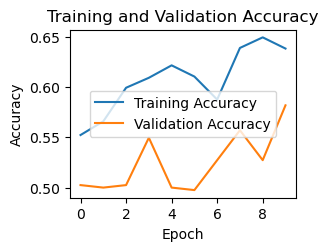

In [13]:
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

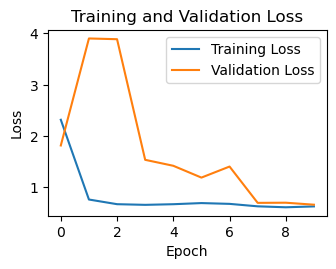

In [14]:
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]

print(f'Final Training Accuracy: {final_training_accuracy * 100:.2f}%')
print(f'Final Validation Accuracy: {final_validation_accuracy * 100:.2f}%')
print(f'Final Training Loss: {final_training_loss:.4f}')
print(f'Final Validation Loss: {final_validation_loss:.4f}')

Final Training Accuracy: 63.80%
Final Validation Accuracy: 58.17%
Final Training Loss: 0.6309
Final Validation Loss: 0.6644


1/1 [==============================] - 0s 362ms/step


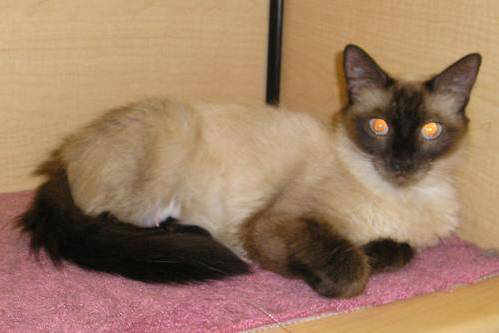

The image is a Cat.


In [18]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\cats\\cat.4019.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')

1/1 [==============================] - 0s 63ms/step


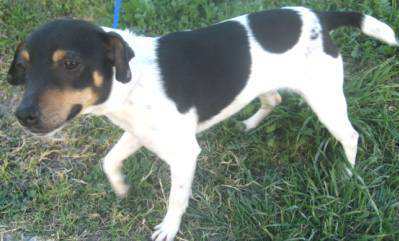

The image is a Dog.


In [21]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\dogs\\dog.4063.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')

1/1 [==============================] - 0s 62ms/step


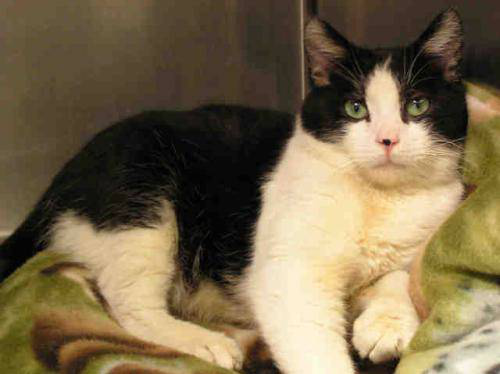

The image is a Cat.


In [22]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\cats\\cat.4062.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')

1/1 [==============================] - 0s 63ms/step


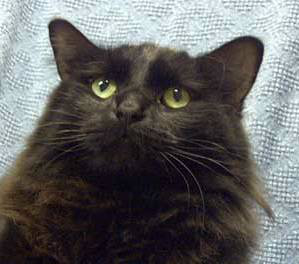

The image is a Cat.


In [23]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\cats\\cat.4122.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')

1/1 [==============================] - 0s 63ms/step


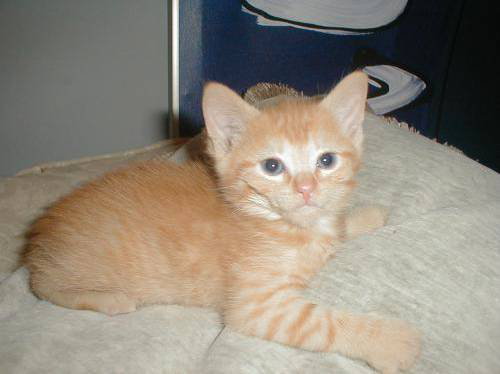

The image is a Cat.


In [25]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\cats\\cat.4310.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')

1/1 [==============================] - 0s 63ms/step


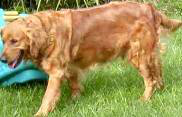

The image is a Dog.


In [26]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\dogs\\dog.4087.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')

1/1 [==============================] - 0s 70ms/step


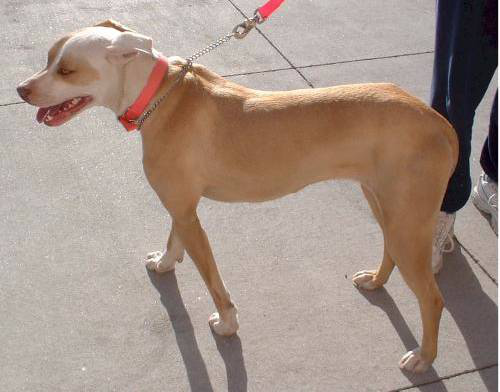

The image is a Dog.


In [29]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\dogs\\dog.4145.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')

1/1 [==============================] - 0s 63ms/step


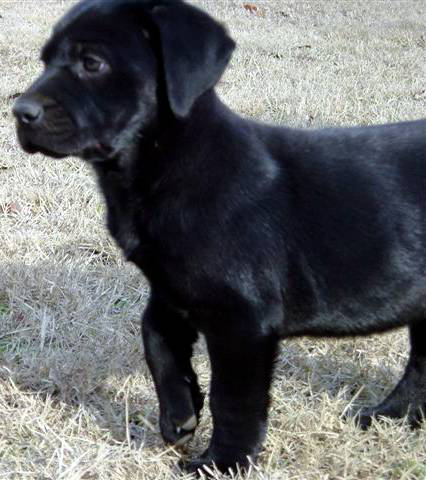

The image is a Dog.


In [32]:
image_path = 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\dog_cat\\dataset\\dogs\\dog.4086.jpg'
result = predict_image(image_path)
img = Image.open(image_path)
display.display(img)
print(f'The image is a {result}.')